# Course Description

Grow your machine learning skills with scikit-learn and discover how to use this popular Python library to train models using labeled data. In this course, you'll learn how to make powerful predictions, such as whether a customer is will churn from your business, whether an individual has diabetes, and even how to tell classify the genre of a song. Using real-world datasets, you'll find out how to build predictive models, tune their parameters, and determine how well they will perform with unseen data.


In [1]:
# Import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Chapter-1: Classification

In this chapter, you'll be introduced to classification problems and learn how to solve them using supervised learning techniques. You'll learn how to split data into training and test sets, fit a model, make predictions, and evaluate accuracy. You’ll discover the relationship between model complexity and performance, applying what you learn to a churn dataset, where you will classify the churn status of a telecom company's customers.

## 1.1. Machine learning with scikit-learn

***Exercise : Binary classification***

There are two types of supervised learning—classification and regression. Binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

The .head() of a dataset, churn_df, is shown below. You can expect the rest of the data to contain similar values.

In [2]:
churn_df = pd.read_csv('data/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


***Instructions***

* Looking at this data, which column could be the target variable for binary classification?

***Response***

====> "churn"

***Exercise : The supervised learning workflow***

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.

***Instructions***

* Drag the code blocks into the correct order to represent how a supervised learning workflow would be executed.

***Answer***

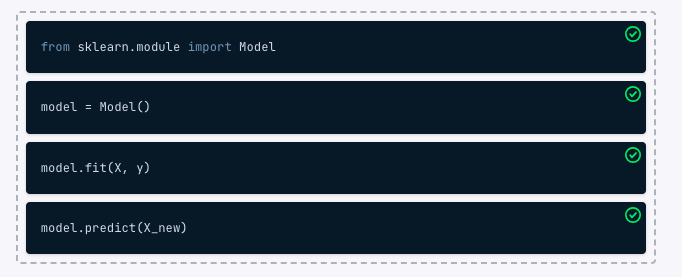

## 1.2. The classification challenge

***Exercise : k-Nearest Neighbors: Fit***

In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The target, "**churn**", needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.

"**account_length**" and "**customer_service_calls**" are treated as **features** because account length indicates customer loyalty, and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn.

***Instructions***

1. Import KNeighborsClassifier from sklearn.neighbors.
2. Instantiate a KNeighborsClassifier called knn with 6 neighbors.
3. Fit the classifier to the data using the .fit() method.

In [3]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
print(y)
X = churn_df[["account_length", "customer_service_calls"]].values
print(X)

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

[0 0 0 ... 0 0 0]
[[128   1]
 [107   1]
 [137   0]
 ...
 [ 28   2]
 [184   2]
 [ 74   0]]


KNeighborsClassifier(n_neighbors=6)

***Exercise : k-Nearest Neighbors: Predict***

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

**X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])**

***Instructions***

1. Create y_pred by predicting the target values of the unseen features X_new using the knn model.
2. Print the predicted labels for the set of predictions.

In [4]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


In [5]:
X1_new = np.array([[30.0, 17.5],
                  [17.0, 25.1],
                  [147.0, 75.1],
                  [157.0, 85.1],
                  [57.0, 25.1],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y1_pred = knn.predict(X1_new)

# Print the predictions
print("Predictions: {}".format(y1_pred)) 

Predictions: [0 0 0 0 0 1 0]


## 1.3. Measuring model performance

***Exercise : Train/test split + computing accuracy***

It's time to practice splitting your data into training and test sets with the **churn_df** dataset!

NumPy arrays have been created for you containing **the features as X** and **the target variable as y**.

***Instructions***

1. Import train_test_split from sklearn.model_selection.
2. Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
3. Fit the knn model to the training data.
4. Compute and print the model's accuracy for the test data.

In [6]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


***Exercise : Overfitting and underfitting***

Interpreting model complexity is a great way to evaluate supervised learning performance. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

The training and test sets have been created from the **churn_df** dataset and preloaded as **X_train**, **X_test**, **y_train**, and **y_test**.

In addition, **KNeighborsClassifier** has been imported for you along with numpy as np.

***Instructions***

1. Create neighbors as a numpy array of values from 1 up to and including 12.
2. Instantiate a KNeighborsClassifier, with the number of neighbors equal to the neighbor iterator.
3. Fit the model to the training data.
4. Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the train_accuracies and test_accuracies dictionaries, respectively, utilizing the neighbor iterator as the index.

In [7]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


***Exercise : Visualizing model complexity***

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables **neighbors**, **train_accuracies**, and **test_accuracies**, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

***Instructions***

* Add a title "KNN: Varying Number of Neighbors".
* Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
* Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
* Display the plot.

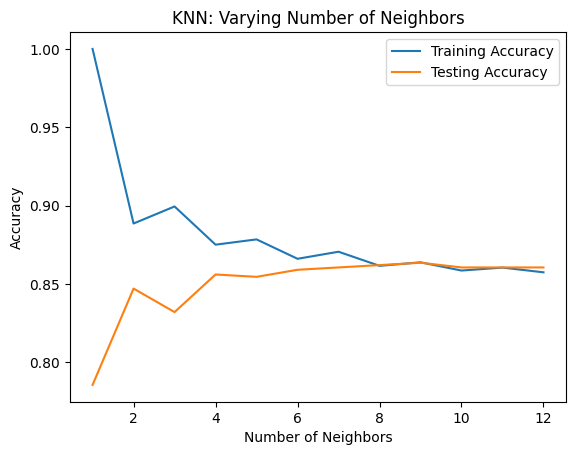

In [8]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Chapter-2: Regression

In this chapter, you will be introduced to regression, and build models to predict sales values using a dataset on advertising expenditure. You will learn about the mechanics of linear regression and common performance metrics such as R-squared and root mean squared error. You will perform k-fold cross-validation, and apply regularization to regression models to reduce the risk of overfitting.

## 2.1. Introduction to regression


***Exercise : Creating features***

In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

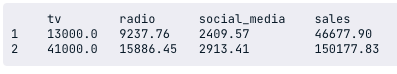

You will use the advertising expenditure as features to predict **sales** values, initially working with the "**radio**" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

***Instructions***

* Create X, an array of the values from the sales_df DataFrame's "radio" column.
* Create y, an array of the values from the sales_df DataFrame's "sales" column.
* Reshape X into a two-dimensional NumPy array.
* Print the shape of X and y.

In [9]:
sales_df = pd.read_csv('data/advertising_and_sales_clean.csv')
sales_df = sales_df.drop(columns=['influencer'])
sales_df.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


In [10]:
import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


***Exercise : Building a linear regression model***

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

X and y have been preloaded for you as follows:

**y = sales_df["sales"].values**

**X = sales_df["radio"].values.reshape(-1, 1)**

***Instructions***

* Import LinearRegression.
* Instantiate a linear regression model.
* Predict sales values using X, storing as predictions.

In [11]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


***Exercise : Visualizing a linear regression model***

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between radio advertising expenditure and sales values.

The variables X, an array of radio values, y, an array of sales values, and predictions, an array of the model's predicted values for y given X, have all been preloaded for you from the previous exercise.

***Instructions***

* Import matplotlib.pyplot as plt.
* Create a scatter plot visualizing y against X, with observations in blue.
* Draw a red line plot displaying the predictions against X.
* Display the plot.

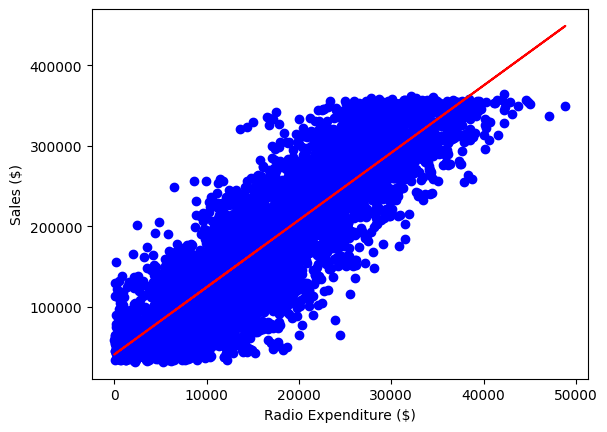

In [12]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## 2.2. The basics of linear regression

***Exercise : Fit and predict for regression***

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the sales_df dataset, which has been preloaded for you. As a reminder, here are the first two rows:

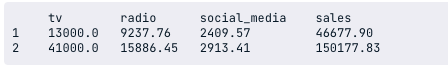

You will then use this model to predict sales based on the values of the test features.

LinearRegression and train_test_split have been preloaded for you from their respective modules.

***Instructions***

* Create X, an array containing values of all features in sales_df, and y, containing all values from the "sales" column.
* Instantiate a linear regression model.
* Fit the model to the training data.
* Create y_pred, making predictions for sales using the test features.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


***Exercise : Regression performance***

Now you have fit a model, reg, using all features from sales_df, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables X_train, X_test, y_train, y_test, and y_pred, along with the fitted model, reg, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

***Instructions***

* Import mean_squared_error.
* Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.
* Calculate the model's root mean squared error using y_test and y_pred.
* Print r_squared and rmse.

In [15]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


## 2.3. Cross-validation

***Exercise : Cross-validation for R-squared***

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model.

***Instructions***

* Import **KFold** and **cross_val_score**.
* Create kf by calling **KFold()**, setting the number of splits to six, shuffle to True, and setting a seed of 5.
* Perform cross-validation using reg on X and y, passing kf to cv.
* Print the cv_results.

In [16]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_results)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


***Exercise : Analyzing cross-validation metrics***

Now you have performed cross-validation, it's time to analyze the results.

You will display the **mean**, **standard deviation**, and **95% confidence interval** for **cv_results**, which has been preloaded for you from the previous exercise.

numpy has been imported for you as np.

***Instructions***

* Calculate and print the mean of the results.
* Calculate and print the standard deviation of cv_results.
* Display the 95% confidence interval for your results using np.quantile().

In [17]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## 2.4. Regularized regression

***Resume of section***

==>> This section discusses regularized regression techniques to prevent overfitting in linear regression models.

**Introduction to Regularization:** Regularization is used to avoid overfitting by penalizing large coefficients in the model.

**Why Regularize?:** Large coefficients can lead to overfitting, so regularization modifies the loss function to penalize large coefficients.

**Ridge Regression:** Ridge regression adds a penalty proportional to the square of the coefficients, controlled by a hyperparameter, alpha. Alpha determines model complexity, where a high alpha can lead to underfitting.

**Ridge in Scikit-Learn:** Ridge regression is implemented in Scikit-Learn by looping over different alpha values, showing that performance decreases as alpha increases.

**Lasso Regression:** Lasso regression penalizes the absolute value of coefficients, unlike Ridge.

**Lasso in Scikit-Learn:** Similar to Ridge, but with a sharp performance drop as alpha increases.

**Lasso for Feature Selection:** Lasso can be used for feature selection by shrinking less important feature coefficients to zero.

**Lasso Feature Selection in Scikit-Learn:** Lasso is applied to assess feature importance, showing that the most important predictor for blood glucose levels is whether an individual has diabetes.

**Feature Importance:** This method is valuable for communicating results to non-technical audiences and identifying important predictors for various phenomena.

***Exercise : Regularized regression: Ridge***

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their R-squared
 scores. You will use all of the **features** in the **sales_df** dataset to predict "sales". The data has been split into **X_train**, **X_test**, **y_train**, **y_test** for you.

A variable called **alphas** has been provided as a l**ist containing different alpha values**, which you will loop through to generate scores

***Instructions***

* Import Ridge.
* Instantiate Ridge, setting alpha equal to alpha.
* Fit the model to the training data.
* Calculate the (R^2) score for each iteration of ridge.

In [18]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  y_pred = ridge.predict(X_test)
  ridge_scores.append(ridge.score(X_test, y_test))
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


***Exercise : Lasso regression for feature importance***

Lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the **sales_df** data and plot the model's coefficients.

The **feature** and **target** variable arrays have been pre-loaded as **X** and **y**, along with **sales_columns**, which contains the dataset's feature names.


***Instructions***

* Import Lasso from sklearn.linear_model.
* Instantiate a Lasso regressor with an alpha of 0.3.
* Fit the model to the data.
* Compute the model's coefficients, storing as lasso_coef.

[ 3.56256962 -0.00397035  0.00496385]


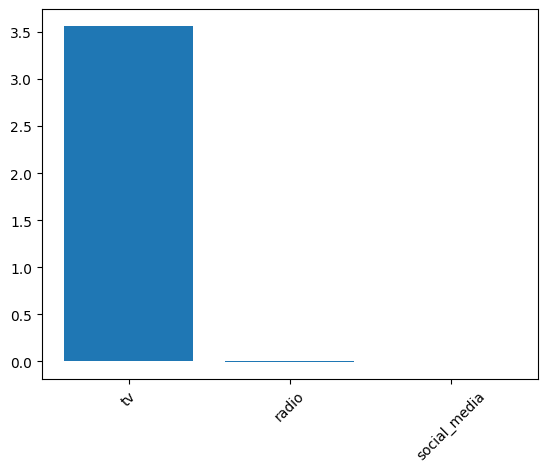

In [19]:
# Import necessary libraries
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Ensure that the number of features in sales_df matches the number of coefficients
# Adjust `sales_df.columns` to only include the relevant feature names corresponding to the coefficients
feature_names = sales_df.columns[:len(lasso_coef)]

# Plot the coefficients
plt.bar(feature_names, lasso_coef)
plt.xticks(rotation=45)
plt.show()


# Chapter-3: Fine-Tuning Your Model

Having trained models, now you will learn how to evaluate them. In this chapter, you will be introduced to several metrics along with a visualization technique for analyzing classification model performance using scikit-learn. You will also learn how to optimize classification and regression models through the use of hyperparameter tuning.

## 3.1. How good is your model?

**Short Resume for Each Point:**

***1. How good is your model?***

Refers to classification problems and their evaluation.

**2. Classification metrics**

Accuracy is commonly used but can be misleading.

**3. Class imbalance**

In imbalanced data, like fraud detection, accuracy alone may not reflect true model performance.

**4. Confusion matrix**

A 2x2 matrix summarizes a binary classifier's performance with actual vs. predicted labels.

**5.  Assessing classification performance**

The confusion matrix includes True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Accuracy can be calculated from this, but other metrics like precision and recall provide deeper insights.

**6. Precision**

Precision = TP / (TP + FP). High precision indicates fewer false positives.

**7. Recall**

Recall = TP / (TP + FN). High recall indicates fewer false negatives.

**8. F1 Score**

The F1 score balances precision and recall, useful when both metrics matter.

**9.  Confusion matrix & classification report in scikit-learn**

Using scikit-learn, confusion matrix and classification report can calculate precision, recall, and other metrics, providing a comprehensive evaluation of model performance.

***Exercise : Deciding on a primary metric***


As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

***Instructions***

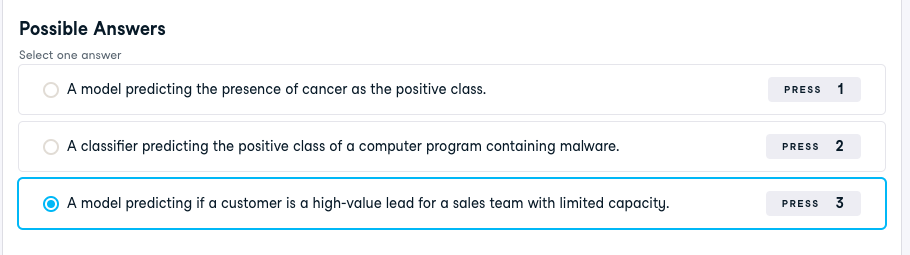

***Exercise : Assessing a diabetes prediction classifier***


In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

**diabetes_df** has been preloaded for you as a pandas DataFrame and split into **X_train**, **X_test**, **y_train**, and **y_test**. In addition, a **KNeighborsClassifier()** has been instantiated and assigned to knn.

***You will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.***


***Instructions***

* Import confusion_matrix and classification_report.
* Fit the model to the training data.
* Predict the labels of the test set, storing the results as y_pred.
* Compute and print the confusion matrix and classification report for the test labels versus the predicted labels.

In [20]:
diabetes_df = pd.read_csv('data/diabetes_clean.csv')
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
X = diabetes_df[["bmi", "age"]].values
y = diabetes_df["diabetes"].values
print(X.shape, y.shape)

(768, 2) (768,)


In [22]:
# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=42)
 

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[158  48]
 [ 55  47]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       206
           1       0.49      0.46      0.48       102

    accuracy                           0.67       308
   macro avg       0.62      0.61      0.62       308
weighted avg       0.66      0.67      0.66       308



## 3.2. Logistic regression and the ROC curve

***Exercise : Building a logistic regression model***

In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The **diabetes_df** dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.




***Instructions***

* Import Lasso from sklearn.linear_model.
* Instantiate a Lasso regressor with an alpha of 0.3.

In [23]:
# Step 1: Import the required functions
from sklearn.model_selection import train_test_split

# Step 2: Separate features (X) and target (y)
X = diabetes_df.drop('diabetes', axis=1).values  # Features (all columns except 'diabetes')
y = diabetes_df['diabetes'].values  # Target variable (the 'diabetes' column)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test ready to use for modeling

In [24]:
#Printing a Subset of the Data

# For pandas DataFrames (X_train and X_test)
print("X_train (first 5 rows):")
print(X_train[:5])  # Print the first 5 rows of the DataFrame

print("\nX_test (first 5 rows):")
print(X_test[:5])  # Print the first 5 rows of the DataFrame

# For pandas Series or numpy arrays (y_train and y_test)
print("\ny_train (first 5 elements):")
print(y_train[:5])  # Print the first 5 elements

print("\ny_test (first 5 elements):")
print(y_test[:5])  # Print the first 5 elements

X_train (first 5 rows):
[[2.000e+00 8.400e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.040e-01
  2.100e+01]
 [9.000e+00 1.120e+02 8.200e+01 2.400e+01 0.000e+00 2.820e+01 1.282e+00
  5.000e+01]
 [1.000e+00 1.390e+02 4.600e+01 1.900e+01 8.300e+01 2.870e+01 6.540e-01
  2.200e+01]
 [0.000e+00 1.610e+02 5.000e+01 0.000e+00 0.000e+00 2.190e+01 2.540e-01
  6.500e+01]
 [6.000e+00 1.340e+02 8.000e+01 3.700e+01 3.700e+02 4.620e+01 2.380e-01
  4.600e+01]]

X_test (first 5 rows):
[[6.00e+00 9.80e+01 5.80e+01 3.30e+01 1.90e+02 3.40e+01 4.30e-01 4.30e+01]
 [2.00e+00 1.12e+02 7.50e+01 3.20e+01 0.00e+00 3.57e+01 1.48e-01 2.10e+01]
 [2.00e+00 1.08e+02 6.40e+01 0.00e+00 0.00e+00 3.08e+01 1.58e-01 2.10e+01]
 [8.00e+00 1.07e+02 8.00e+01 0.00e+00 0.00e+00 2.46e+01 8.56e-01 3.40e+01]
 [7.00e+00 1.36e+02 9.00e+01 0.00e+00 0.00e+00 2.99e+01 2.10e-01 5.00e+01]]

y_train (first 5 elements):
[0 1 0 0 1]

y_test (first 5 elements):
[0 0 0 0 0]


In [25]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.2758503  0.18842069 0.11448981 0.16368795 0.4715251  0.44170194
 0.01545458 0.6605503  0.54136875 0.77717331]


***Exercise : The ROC curve***

Now you have built a logistic regression model for predicting diabetes status, you can plot the **ROC curve** to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

The **test labels**, **y_test**, and the **predicted probabilities** of the test features belonging to the positive class, **y_pred_probs**, have been preloaded for you, along with matplotlib.pyplot as plt.

You will create a **ROC** curve and then interpret the results.


***Instructions 1/2***

* Import roc_curve.
* Calculate the ROC curve values, using y_test and y_pred_probs, and unpacking the results into fpr, tpr, and thresholds.
* Plot true positive rate against false positive rate.

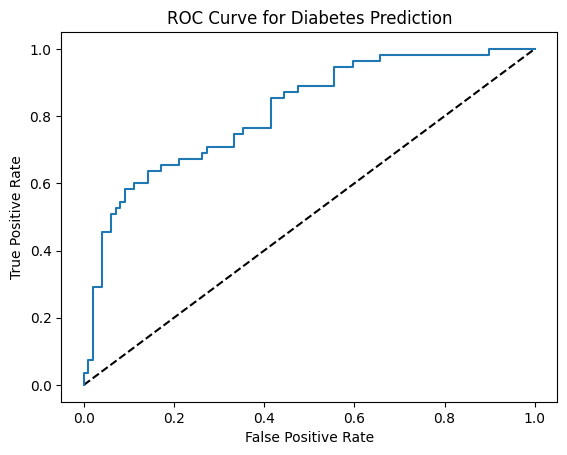

In [26]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

***Instructions 2/2***

**Question**

Well done on producing the ROC curve for the diabetes prediction model.

But, what does the plot tell you about the model's performance?

**Response**


- The model is about as good as randomly guessing the class of each observation.

- The model is much worse than randomly guessing the class of each observation.

- **The model is much better than randomly guessing the class of each observation.**  ==> Correct Answer

- It is not possible to conclude whether the model performs better or worse than randomly guessing the class of each observation.

***Exercise : ROC AUC***

The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.

The **confusion_matrix** and **classification_report** functions have been preloaded for you, along with the **logreg** model you previously built, plus **X_train**, **X_test**, **y_train**, **y_test**. Also, the model's predicted test set labels are stored as **y_pred**, and probabilities of test set observations belonging to the positive class stored as **y_pred_probs**.

A **knn** model has also been created and the performance metrics printed in the console, so you can compare the **roc_auc_score**, **confusion_matrix**, and **classification_report** between the two models.




***Instructions***

* Import roc_auc_score.
* Calculate and print the ROC AUC score, passing the test labels and the predicted positive class probabilities.
* Calculate and print the confusion matrix.
* Call classification_report().

In [27]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probs))

# Ensure y_pred is generated from the test set
y_pred = logreg.predict(X_test)

# Print shapes to debug
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Calculate the confusion matrix if dimensions match
if y_test.shape[0] == y_pred.shape[0]:
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("Mismatch in number of samples between y_test and y_pred.")

# Calculate the classification report
if y_test.shape[0] == y_pred.shape[0]:
    print("Classification Report:\n", classification_report(y_test, y_pred))
else:
    print("Mismatch in number of samples between y_test and y_pred.")


ROC AUC Score: 0.8130394857667584
y_test shape: (154,)
y_pred shape: (154,)
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



**===>>> Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes it easy to produce several classification metrics with only a few lines of code.**

## 3.3. Hyperparameter tuning

***Exercise : Hyperparameter tuning with GridSearchCV***

Now you have seen how to perform **grid search hyperparameter tuning**, you are going to build a **lasso regression model** with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

X_train, X_test, y_train, and y_test have been preloaded for you. A KFold() object has been created and stored for you as kf, along with a lasso regression model as lasso.

***Instructions***

* Import GridSearchCV.
* Set up a parameter grid for "alpha", using np.linspace() to create 20 evenly spaced values ranging from 0.00001 to 1.
* Call GridSearchCV(), passing lasso, the parameter grid, and setting cv equal to kf.
* Fit the grid search object to the training data to perform a cross-validated grid search.

In [28]:
# Step 1: Import the required functions
from sklearn.model_selection import train_test_split

# Step 2: Separate features (X) and target (y)
X = diabetes_df.drop('glucose', axis=1).values  # Features (all columns except 'diabetes')
y = diabetes_df['glucose'].values  # Target variable (the 'diabetes' column)

print("X:", X)
print("####")
print("y:", y)
print("####")
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test ready to use for modeling
print("X_train:", X_train)
print("####")
print("X_test:", X_test)
print("####")
print("y_train:", y_train)
print("####")
print("y_test:", y_test)

X: [[ 6.    72.    35.    ...  0.627 50.     1.   ]
 [ 1.    66.    29.    ...  0.351 31.     0.   ]
 [ 8.    64.     0.    ...  0.672 32.     1.   ]
 ...
 [ 5.    72.    23.    ...  0.245 30.     0.   ]
 [ 1.    60.     0.    ...  0.349 47.     1.   ]
 [ 1.    70.    31.    ...  0.315 23.     0.   ]]
####
y: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 115 126  99 196 119 143 125 147  97 145 117 109 158  88  92 122 103
 138 102  90 111 180 133 106 171 159 180 146  71 103 105 103 101  88 176
 150  73 187 100 146 105  84 133  44 141 114  99 109 109  95 146 100 139
 126 129  79   0  62  95 131 112 113  74  83 101 137 110 106 100 136 107
  80 123  81 134 142 144  92  71  93 122 163 151 125  81  85 126  96 144
  83  95 171 155  89  76 160 146 124  78  97  99 162 111 107 132 113  88
 120 118 117 105 173 122 170  84  96 125 100  93 129 105 128 106 108 108
 154 102  57 106 147  90 136 114 156 153 188 152  99 109  88 163 151 102
 114 100 131 104 148 120 110 111

In [29]:
# Instantiate Lasso model
lasso = Lasso()

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate GridSearchCV for Lasso with 5-fold cross-validation
lasso_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.05264105263157895}
Tuned lasso score: 0.3265989419658603


***Exercise : Hyperparameter tuning with RandomizedSearchCV***

As you saw, **GridSearchCV** can be computationally expensive, especially if you are searching over a **large hyperparameter space**. In this case, you can use **RandomizedSearchCV**, which tests a fixed number of hyperparameter settings from specified probability distributions.

Training and test sets from **diabetes_df** have been pre-loaded for you as X_train. X_test, y_train, and y_test, where the target is "**diabetes**". A **logistic regression model** has been created and stored as **logreg**, as well as a **KFold** variable stored as kf.

You will define a range of hyperparameters and use **RandomizedSearchCV**, which has been imported from **sklearn.model_selection**, to look for optimal hyperparameters from these options.


***Instructions***
* Create params, adding "l1" and "l2" as penalty values, setting C to a range of 50 float values between 0.1 and 1.0, and class_weight to either "balanced" or a dictionary containing 0:0.8, 1:0.2.
* Create the Randomized Search CV object, passing the model and the parameters, and setting cv equal to kf.
* Fit logreg_cv to the training data.
* Print the model's best parameters and accuracy score.

In [30]:
# Step 1: Import the required functions
from sklearn.model_selection import train_test_split

# Step 2: Separate features (X) and target (y)
X = diabetes_df.drop('diabetes', axis=1).values  # Features (all columns except 'diabetes')
y = diabetes_df['diabetes'].values  # Target variable (the 'diabetes' column)

print("X:", X)
print("####")
print("y:", y)
print("####")
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test ready to use for modeling
print("X_train:", X_train)
print("####")
print("X_test:", X_test)
print("####")
print("y_train:", y_train)
print("####")
print("y_test:", y_test)

X: [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
####
y: [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create the parameter space
params = {"logreg__penalty": ["l1", "l2"],
          "logreg__tol": np.linspace(0.0001, 1.0, 50),
          "logreg__C": np.linspace(0.1, 1.0, 50),
          "logreg__class_weight": ["balanced", {0:0.8, 1:0.2}],
          "logreg__solver": ["liblinear", "saga"],
          "logreg__max_iter": [200, 300, 400]}

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(pipeline, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'logreg__tol': 0.9795938775510205, 'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__max_iter': 200, 'logreg__class_weight': 'balanced', 'logreg__C': 0.3204081632653062}
Tuned Logistic Regression Best Accuracy Score: 0.7589155403261628


**===>>>. Even without exhaustively trying every combination of hyperparameters, the model has an accuracy of over 70% on the test set! So far we have worked with clean datasets; however, in the next chapter, we will discuss the steps required to transform messy data before building supervised learning models.**

# Chapter-4: Preprocessing and Pipelines

Learn how to impute missing values, convert categorical data to numeric values, scale data, evaluate multiple supervised learning models simultaneously, and build pipelines to streamline your workflow!

## 4.1. Preprocessing data


In [32]:
music_df = pd.read_csv('data/music_clean.csv')
music_df.head()
print(music_df.columns)
print(music_df["genre"])

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: genre, Length: 1000, dtype: int64


***Exercise : Creating dummy variables***

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The **music_df** dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus **dummy variables from the "genre"** column.

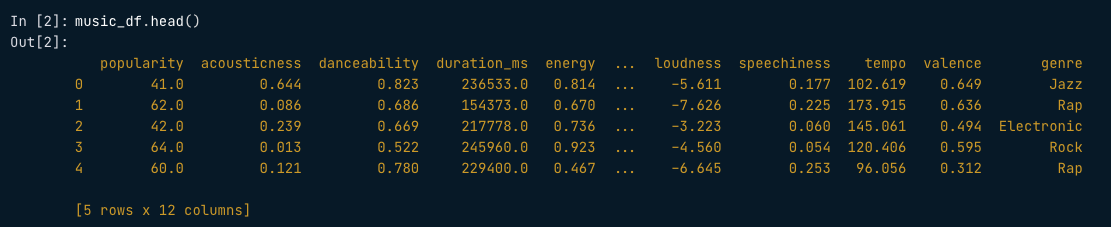





***Instructions***

**Use a relevant function, passing the entire music_df DataFrame, to create music_dummies, dropping the first binary column.**
**Print the shape of music_dummies.**



In [33]:
print(music_df.isna().sum().sort_values())
print("################")

# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)
print(music_dummies.info())
print("################")
print(music_dummies.head())
print("################")

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   popularity        1000 non-null   float64
 2   acousticness      1000 non-null   float64
 3   danceability      1000 non-null   float64
 4   duration_ms       1000 non-null   float64
 5   energy            1000 non-null   float64
 6   instrumentalness  1000 non-null   float64
 7   liveness          1000 non-null   float64
 8   loudness          1000 non-null   float64
 9   speechiness       1000 non-null   float64
 10  tempo    

**===>>>. As there were ten values in the "genre" column, nine new columns were added by a call of pd.get_dummies() using drop_first=True. After dropping the original "genre" column, there are still eight new columns in the DataFrame!**

***Exercise : Regression with categorical features***

Now you have created **music_dummies**, **containing binary features for each song's genre**, it's time to build a **ridge regression model** to predict song popularity.

music_dummies has been preloaded for you, along with Ridge, cross_val_score, numpy as np, and a **KFold** object stored as kf.

The model will be evaluated by calculating **the average RMSE**, but first, you will need to convert the scores for each fold to positive values and take their square root. **This metric shows the average error of our model's predictions**, so it can be compared against the standard deviation of the target value—"popularity".


***Instructions***

* Create X, containing all features in music_dummies, and y, consisting of the "popularity" column, respectively.
* Instantiate a ridge regression model, setting alpha equal to 0.2.
* Perform cross-validation on X and y using the ridge model, setting cv equal to kf, and using negative mean squared error as the scoring metric.
* Print the RMSE values by converting negative scores to positive and taking the square root.

In [34]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 10.00867853995568
Standard Deviation of the target array: 14.02156909907019


**===>>> An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.**

## 4.2. Handling missing data


***Exercise : Dropping missing data***

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.



***Instructions 1/3***

* Print the number of missing values for each column in the music_df dataset, sorted in ascending order.

In [35]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64



***Instructions 2/3***

* Remove values for all columns with 50 or fewer missing values.

In [36]:
# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])


***Instructions 3/3***

* Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.

In [37]:
# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 13)


***Exercise : Pipeline for song genre prediction: I***

Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified **music_df** dataset that you created in the previous exercise has been preloaded for you, along with **KNeighborsClassifier** and **train_test_split**

***Instructions***

* Import SimpleImputer and Pipeline.
* Instantiate an imputer.
* Instantiate a KNN classifier with three neighbors.
* Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".

In [38]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer),  # Imputation step
         ("knn", knn)]  # KNN classification step

***Exercise : Pipeline for song genre prediction: II***

Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

**X_train**, **X_test**, **y_train**, and **y_test** have been preloaded for you, and **confusion_matrix** has been imported from sklearn.metrics.

***Instructions***

* Create a pipeline using the steps you previously defined.
* Fit the pipeline to the training data.
* Make predictions on the test set.
* Calculate and print the confusion matrix.

In [39]:
# Instantiate the imputer (using mean strategy)
imputer = SimpleImputer(strategy='mean')

steps = [("imputer", imputer),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 4.3. Centering and scaling


**Summary and Key Points:**

**Centering and Scaling:**

After data imputation, another crucial preprocessing step is centering and scaling. This involves adjusting data so features are on a similar scale, which is important for many machine learning models.

**Why Scale Data?:**

Different features in the dataset can have widely varying ranges (e.g., duration in milliseconds vs. speechiness). If not scaled, features with larger ranges can disproportionately influence models like KNN, which rely on distance calculations.

**Scaling Methods:**

Standardization: Subtract the mean and divide by the variance, centering data around zero with a variance of one.
Normalization: Scale data to a range, such as 0 to 1 or -1 to 1. Standardization is used in the video, but scikit-learn supports other methods.

**Scaling in scikit-learn:**

Use StandardScaler from sklearn.preprocessing. Split data before scaling to avoid data leakage, fit the scaler on training data, and transform both training and test sets. This ensures features are centered and scaled appropriately.

**Scaling in a Pipeline:**

Incorporate the scaler into a pipeline with a KNN model. This automates scaling during model fitting and prediction. When tested, scaling improved model accuracy from 0.53 to 0.81.

**Comparing Performance:**

The scaled data significantly improved model performance compared to unscaled data, demonstrating the importance of scaling.

**Cross-Validation (CV) and Scaling in a Pipeline:**

Cross-validation can be integrated with pipelines to fine-tune hyperparameters (e.g., number of neighbors in KNN). By using GridSearchCV, the pipeline finds the optimal model configuration, leading to slight performance improvements.

**Checking Model Parameters:**

After grid search, the optimal model with 12 neighbors was identified, slightly improving accuracy over previous models.

**Explanation:**

Scaling and centering are essential for ensuring that all features contribute equally to distance-based models like KNN. Without scaling, features with larger ranges can dominate the model's decisions. By using tools like StandardScaler and pipelines in scikit-learn, scaling can be seamlessly integrated into the machine learning workflow, improving model performance. Additionally, cross-validation within pipelines allows for efficient hyperparameter tuning, further enhancing accuracy.

***Exercise : Centering and scaling for regression***

Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the **music_df** features and build a **lasso regression model** to predict a **song's loudness**.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where **the target is "loudness" and the features are all other columns in the dataset**. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.




***Instructions***

* Import StandardScaler.
* Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
* Instantiate a pipeline with steps to scale and build a lasso regression model.
* Calculate the R-squared value on the test data.

In [40]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,0
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,0


In [41]:
from sklearn.model_selection import train_test_split

# Create the feature matrix X and target vector y
X = music_df.drop(columns=['loudness'], axis=1).values  # Features are all columns except 'loudness'
y = music_df['loudness'].values  # Target is the 'loudness' column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 12)
X_test shape: (300, 12)
y_train shape: (700,)
y_test shape: (300,)


In [42]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

# Create pipeline steps
steps = [("scaler", StandardScaler()),  # Step to scale the data
         ("lasso", Lasso(alpha=0.5))]   # Step to build a Lasso model with alpha=0.5

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.7185052514704713


**===>>>. Awesome scaling! The model may have only produced an R-squared of 0.718, but without scaling this exact model would have only produced a score of 0.35, which proves just how powerful scaling can be!**


***Exercise : Centering and scaling for classification***

Now you will bring together scaling and model building into a pipeline for **cross-validation**.

Your task is to build a pipeline to scale features in the music_df dataset and perform **grid search cross-validation** using a **logistic regression model** with different values for the hyperparameter C. **The target variable here is "genre"**, which contains binary values for rock as 1 and any other genre as 0.

StandardScaler, LogisticRegression, and GridSearchCV have all been imported for you.



***Instructions***

* Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".
* Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
* Instantiate the grid search object.
* Fit the grid search object to the training data.

In [43]:
# Create the feature matrix X and target vector y
#X = music_df.drop(columns=['genre'], axis=1).values  # Features are all columns except 'genre'
#y = music_df['genre'].values  # Target is the 'genre' column

In [44]:
music_df2 = pd.read_csv('data/music_clean.csv')
music_df2.head()
print(music_df2.columns)
print(music_df2["genre"])

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: genre, Length: 1000, dtype: int64


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

# Assuming X and y have been defined, with X as the features and y as the target variable
X = music_df2.drop('genre', axis=1)  # Features excluding the target
y = music_df2['genre']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)

print(cv.best_score_, "\n", cv.best_params_)


0.9275 
 {'logreg__C': 0.5793684210526315}


**=== >>> Using a pipeline shows that a logistic regression model with "C" set to approximately 0.5793 produces a model with 0.92 accuracy!**

## 4.4. Evaluating multiple models


***Exercise : Visualizing regression model performance***

Now you have seen how to evaluate **multiple models** out of the box, you will build **three regression models** to predict a song's "energy" levels.

The **music_df** dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: **LinearRegression**, **Ridge**, **Lasso**, **cross_val_score**, and **KFold**.



***Instructions***

* Write a for loop using model as the iterator, and model.values() as the iterable.
* Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
* Append the model's cross-validation scores to the results list.
* Create a box plot displaying the results, with the x-axis labels as the names of the models.

In [46]:
music_df3 = pd.read_csv('data/music_clean.csv')
music_df3.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [47]:
music_df3.columns

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre'],
      dtype='object')

In [48]:

# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold

X3 = music_df3.drop("genre", axis=1).values
y3 = music_df3["genre"].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)
 

Linear Regression Cross-Validation Scores: [0.65195251 0.44019754 0.60777068 0.58779721 0.67177198 0.48354537]
Mean Score for Linear Regression: 0.5738392153872561

Ridge Cross-Validation Scores: [0.65020691 0.44261889 0.60961015 0.58777574 0.67029473 0.48267651]
Mean Score for Ridge: 0.5738638204392257

Lasso Cross-Validation Scores: [0.41016983 0.42933605 0.51530901 0.4812154  0.49142359 0.2643919 ]
Mean Score for Lasso: 0.4319742960789135



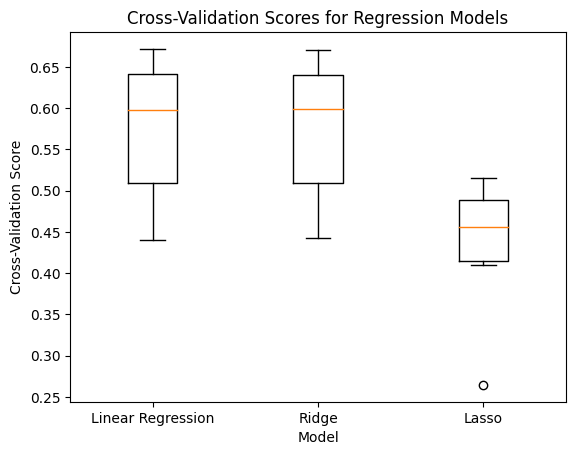

In [49]:
# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1)
}
results = []

# Loop through the models' values
for model_name, model in models.items():  # Use .items() to get both model names and models
    # Define the KFold cross-validator
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train3, y_train3, cv=kf)
    
    # Append the results
    results.append(cv_scores)
    
    # Print the cross-validation scores for each model
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"Mean Score for {model_name}: {cv_scores.mean()}\n")

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.title("Cross-Validation Scores for Regression Models")
plt.ylabel("Cross-Validation Score")
plt.xlabel("Model")
plt.show()


====>>>> To determine which model is the best among Linear Regression, Ridge, and Lasso, **you can compare their mean cross-validation scores. The higher the mean score, the better the model is performing** in terms of predicting the target variable (e.g., energy levels in your dataset).

**Here are the mean scores for each model:**

**Linear Regression: 0.5738**

**Ridge: 0.5739**

**Lasso: 0.4320**

**Conclusion:**

**Ridge Regressio**n has the highest mean cross-validation score (0.5739), making it the best-performing model among the three based on this metric.

**Linear Regression** is very close to Ridge Regression with a mean score of 0.5738, but slightly lower.

**Lasso Regression** has the lowest mean score (0.4320), indicating it performs the worst among the three models in this context.

**Therefore, Ridge Regression would be the best model to choose based on the cross-validation scores.**


**===>>> Let's make predictions on the test set, and see if the RMSE can guide us on model selection.**

***Exercise : Predicting on the test set***

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check **predictive performance** on the test set to see if either one can outperform the other.

You will use **root mean squared error (RMSE**) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.



***Instructions***

* Import mean_squared_error.
* Fit the model to the scaled training features and the training labels.
* Make predictions using the scaled test features.
* Calculate RMSE by passing the test set labels and the predicted labels.

In [50]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train3, y_train3)
  
  # Make predictions on the test set
  y_pred3 = model.predict(X_test3)

  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test3, y_pred3, squared=False) 
  print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.378041091131301
Ridge Test Set RMSE: 0.377120797997644
Lasso Test Set RMSE: 0.3832055953313204


**=== >>>The Root Mean Squared Error (RMSE) values you provided represent the prediction errors of the models on the test set. RMSE is a metric that measures the average magnitude of the prediction errors. A lower RMSE indicates better predictive accuracy.**

Here are the RMSE values for each model:

* Linear Regression Test Set RMSE: 0.3780

* Ridge Regression Test Set RMSE: 0.3771

* Lasso Regression Test Set RMSE: 0.3832

**Interpretation:**

1. Ridge Regression has the lowest RMSE (0.3771), indicating that it has the best predictive performance on the test set among the three models. This means that Ridge Regression made the smallest average prediction errors when predicting the target values.

2. Linear Regression has a slightly higher RMSE (0.3780) compared to Ridge Regression. The difference between Ridge and Linear Regression is very small, so their predictive performance is almost identical.

3. Lasso Regression has the highest RMSE (0.3832), meaning it had the largest average prediction errors. Therefore, it performed the worst on the test set among the three models.

**Conclusion:**

Based on these RMSE values, **Ridge Regression would be the preferred model **since it has the **lowest prediction error**. However, the difference between Ridge and Linear Regression is minimal, so either model could be chosen, depending on other considerations such as model simplicity or regularization preferences.

***Exercise : Visualizing classification model performance***

In this exercise, you will be solving a **classification problem** where the "**popularity**" column in the music_df dataset has been converted to **binary values**, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been **split**, **scaled**, and **preloaded** for you as **X_train_scaled**, **X_test_scaled**, **y_train**, and **y_test**. Additionally, **KNeighborsClassifier**, **DecisionTreeClassifier**, and **LogisticRegression** have been imported.


***Instructions***

* Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
* Loop through the values in models.
* Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.
* Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.

In [51]:
music_df4 = pd.read_csv('data/music_clean.csv')
music_df4.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [52]:
# Calculate the median of the popularity column
median_popularity = music_df4['popularity'].median()

# Create the popularity_label column
music_df4['popularity_label'] = (music_df4['popularity'] >= median_popularity).astype(int)
music_df4 = music_df4.drop(columns=['popularity', 'Unnamed: 0'])

# Display the updated DataFrame
print(music_df4)

     acousticness  danceability  duration_ms  energy  instrumentalness  \
0        0.896000         0.726     214547.0  0.1770          0.000002   
1        0.003840         0.635     190448.0  0.9080          0.083400   
2        0.000075         0.352     456320.0  0.9560          0.020300   
3        0.945000         0.488     352280.0  0.3260          0.015700   
4        0.245000         0.667     273693.0  0.6470          0.000297   
..            ...           ...          ...     ...               ...   
995      0.972000         0.193     208040.0  0.0329          0.929000   
996      0.005790         0.939     144453.0  0.3730          0.000000   
997      0.016100         0.739     238339.0  0.5390          0.000000   
998      0.326000         0.515     286707.0  0.5050          0.000000   
999      0.029500         0.291     194679.0  0.5980          0.002270   

     liveness  loudness  speechiness    tempo  valence  genre  \
0      0.1160   -14.824       0.0353   92.934 

In [53]:
print(music_df4.columns)

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre', 'popularity_label'],
      dtype='object')


Logistic Regression Cross-Validation Scores: [0.81343284 0.82835821 0.7593985  0.78195489 0.77443609 0.77443609]
Mean Score for Logistic Regression: 0.7886694347809823

KNN Cross-Validation Scores: [0.76119403 0.7761194  0.69924812 0.81203008 0.7593985  0.73684211]
Mean Score for KNN: 0.757472038304717

Decision Tree Classifier Cross-Validation Scores: [0.7238806  0.70895522 0.66165414 0.72180451 0.66165414 0.70676692]
Mean Score for Decision Tree Classifier: 0.6974525866906071



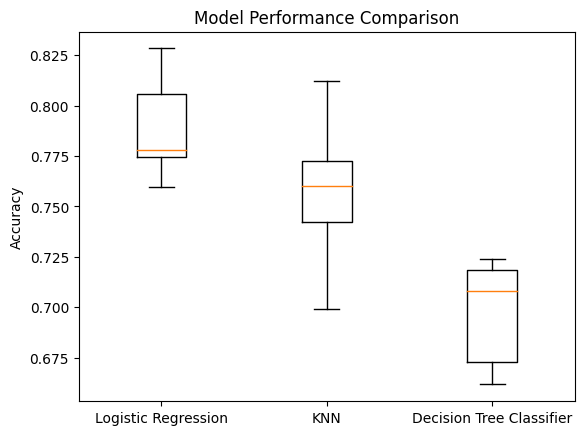

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# Split the data into features (X) and target (y)
X4 = music_df4.drop(columns=['popularity_label'])  # Drop the popularity column (you've already converted it)
y4 = music_df4['popularity_label']  # Use the binary label as the target

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize a StandardScaler and fit it on the training data, then transform both train and test sets
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
X_test_scaled4 = scaler.transform(X_test4)

# Create models dictionary
# Create models dictionary
models = {"Logistic Regression": LogisticRegression (),
          "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier()
         }

# To store cross-validation results
results = []

# Loop through the models' values
for model_name, model in models.items():  # Remove the extra colon
  
    # Instantiate a KFold object
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
    # Perform cross-validation and store the results
    cv_results = cross_val_score(model, X_train_scaled4, y_train4, cv=kf)
    results.append(cv_results)
    
    # Print the cross-validation scores for each model
    print(f"{model_name} Cross-Validation Scores: {cv_results}")
    print(f"Mean Score for {model_name}: {cv_results.mean()}\n")


# Visualize the cross-validation results
plt.boxplot(results, labels=models.keys())
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.show()


**=== >>>. Looks like logistic regression is the best candidate based on the cross-validation results!**

***Exercise : Pipeline for predicting song popularity***

For the final exercise, you will build a **pipeline** **to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model**. The aim is to find the best **parameters** and **accuracy** when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.


***Instructions***

* Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
* Create a pipeline object, and pass the steps variable.
* Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
* Print the best parameters and compute and print the test set accuracy score for the grid search object.Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.


In [55]:
#music_df5 = pd.read_csv('data/music_clean.csv')
#music_df5.head()

In [56]:
from sklearn.model_selection import train_test_split

# Create the feature matrix X and target vector y
#X5 = music_df5.drop(columns=['genre'], axis=1).values  # Features are all columns except 'loudness'
#y5 = music_df5['genre'].values  # Target is the 'loudness' column

# Split the data into training and test sets
#X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.3, random_state=42)

# Print the shapes to verify
print("X_train shape:", X_train4.shape)
print("X_test shape:", X_test4.shape)
print("y_train shape:", y_train4.shape)
print("y_test shape:", y_test4.shape)

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


**
===>>> Here's the complete code to build a pipeline for predicting song popularity, performing hyperparameter tuning, and evaluating the model's performance:**

In [57]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create steps for the pipeline
steps = [("imp_mean", SimpleImputer(strategy="mean")),  # Impute missing values using the mean strategy
         ("scaler", StandardScaler()),  # Scale features using StandardScaler
         ("logreg", LogisticRegression())]  # Logistic regression model

# Set up the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameter grid for logistic regression
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],  # Different solvers
          "logreg__C": np.linspace(0.001, 1.0, 10)}  # Regularization strength

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params, cv=5)  # 5-fold cross-validation

# Fit the model on the training data
tuning.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {:.4f}".format(tuning.best_params_, tuning.score(X_test, y_test)))


Tuned Logistic Regression Parameters: {'logreg__C': 0.556, 'logreg__solver': 'newton-cg'}, Accuracy: 0.8800


**Explanation:**

**Pipeline Steps:**

* SimpleImputer: Handles missing values by imputing with the mean.

* StandardScaler: Scales features to ensure they're on the same scale.

* LogisticRegression: The model for prediction.

**GridSearchCV:**

Performs hyperparameter tuning using cross-validation to find the best combination of parameters.

Output:

**Prints the best hyperparameters found by GridSearchCV and the accuracy score on the test set.**

**===>>> This code should help you effectively tune your model and evaluate its performance!**









# Congratulations!